#### Import libraries

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
from os import path
import numpy as np

#### Read the dataset 

In [2]:
import os 
os.getcwd()

'/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/2.-Mask_creation/CERRA'

In [3]:
path = '/media/kevin/Expansion/Kevin/CERRA/'
path_in = 'CERRA_daily_combined/'
path_out = '/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/3.-data_with_NAN_values_corrected/CERRA/'
name_infile = 'CERRA_daily_2010-2022.nc' #'era5SL_010_144x144_kmh_1961-2021.nc'
name_outfile = 'CERRA_daily_2010-2022_pen.nc'  #'era5SL_010_144x144_m_s_2010-2021.nc'


ds = xr.open_dataset(path + path_in + name_infile)

#### Information of the dataset

In [4]:
print(ds)

<xarray.Dataset> Size: 149GB
Dimensions:    (time: 4656, y: 1069, x: 1069)
Coordinates:
    latitude   (y, x) float64 9MB ...
    longitude  (y, x) float64 9MB ...
  * time       (time) datetime64[ns] 37kB 2010-01-01 2010-01-02 ... 2022-09-30
Dimensions without coordinates: y, x
Data variables:
    si10       (time, y, x) float32 21GB ...
    r2         (time, y, x) float32 21GB ...
    t2m        (time, y, x) float32 21GB ...
    msl        (time, y, x) float32 21GB ...
    orog       (time, y, x) float32 21GB ...
    sp         (time, y, x) float32 21GB ...
    sr         (time, y, x) float32 21GB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2025-04-11T06:37 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             Daily averages of 3-hourly CERRA data
    source_file:             CERRA_2010.nc
   

In [5]:
print('Min Lon: ', ds.longitude.min().item())
print('Max Lon: ', ds.longitude.max().item())
print('Min Lat: ', ds.latitude.min().item())
print('Max Lat: ', ds.latitude.max().item())

Min Lon:  6.94708369753805e-05
Max Lon:  359.9999590223182
Min Lat:  20.292280999999985
Max Lat:  75.34678492314951


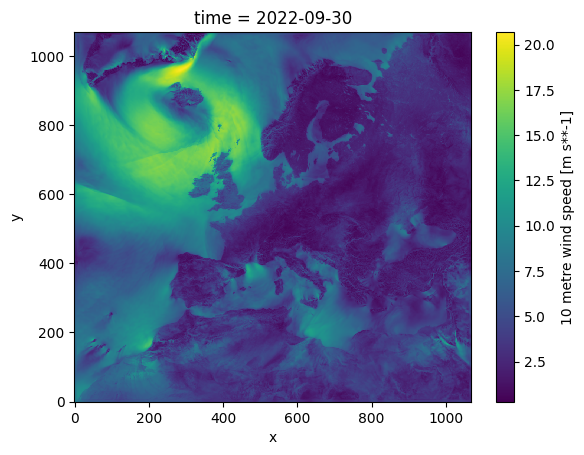

In [6]:
ds['si10'].isel(time=-1).plot()

In [7]:
# import xarray as xr
# import numpy as np
# from pyproj import CRS, Transformer

# # Assuming ds is already opened, e.g.:
# # ds = xr.open_dataset("cerra_subdaily_2007.nc")

# # 1. Get lat/lon values (2D arrays)
# lon = ds.longitude.values
# lat = ds.latitude.values

# # 2. Define Lambert Conformal Conic projection (CERRA parameters)
# proj_lcc = CRS(proj="lcc",
#                lat_1=50.0,
#                lat_2=50.0,
#                lat_0=50.0,
#                lon_0=8.0,
#                x_0=0.0,
#                y_0=0.0,
#                a=6371229.0,
#                b=6371229.0)

# # 3. Define transformer from WGS84 to Lambert
# transformer = Transformer.from_crs("EPSG:4326", proj_lcc, always_xy=True)

# # 4. Project the entire grid from lon/lat to x/y
# x_lcc, y_lcc = transformer.transform(lon, lat)

# # 5. Optional: Add projected coordinates back into the dataset
# ds = ds.assign_coords(x=("x", x_lcc),
#                       y=("y", y_lcc))


### Import an original CERRA fiel to extract the attributes necessary to convert to Lambert 

In [8]:
os.getcwd()

'/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/2.-Mask_creation/CERRA'

In [9]:
path_CERRA_file_attrs = os.path.join(os.getcwd(), '../../0.-Create_AEMET_CERRA_grid/cerra_subdaily_2012.nc')
ds_attrs = xr.open_dataset(path_CERRA_file_attrs)

/tmp/ipykernel_456895/1598505953.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_attrs = xr.open_dataset(path_CERRA_file_attrs)


In [10]:
attrs_CERRA = ds_attrs['si10'].attrs

In [11]:
attrs_CERRA

{'GRIB_paramId': np.int64(207),
 'GRIB_dataType': 'an',
 'GRIB_numberOfPoints': np.int64(1142761),
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': np.int64(1),
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'lambert',
 'GRIB_DxInMetres': np.float64(5500.0),
 'GRIB_DyInMetres': np.float64(5500.0),
 'GRIB_LaDInDegrees': np.float64(50.0),
 'GRIB_Latin1InDegrees': np.float64(50.0),
 'GRIB_Latin2InDegrees': np.float64(50.0),
 'GRIB_LoVInDegrees': np.float64(8.0),
 'GRIB_NV': np.int64(214),
 'GRIB_Nx': np.int64(1069),
 'GRIB_Ny': np.int64(1069),
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'si10',
 'GRIB_gridDefinitionDescription': 'Lambert conformal',
 'GRIB_iScansNegatively': np.int64(0),
 'GRIB_jPointsAreConsecutive': np.int64(0),
 'GRIB_jScansPositively': np.int64(1),
 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(20.292281),
 'GRIB_latitudeOfSouthernPoleInDegrees': np.float64(-90.0),
 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(342.514057),
 'GRIB_longitud

In [12]:
import xarray as xr
import numpy as np
from pyproj import CRS, Transformer

# Open dataset
# ds = xr.open_dataset("cerra_subdaily_2007.nc")

# Define Lambert Conformal Conic projection (CERRA parameters)
proj_lcc = CRS(proj="lcc",
               lat_1=50.0,
               lat_2=50.0,
               lat_0=50.0,
               lon_0=8.0,
               x_0=0.0,
               y_0=0.0,
               a=6371229.0,
               b=6371229.0)

transformer = Transformer.from_crs("EPSG:4326", proj_lcc, always_xy=True)

# Extract 1D lat/lon profiles
lon_x = ds.longitude[0, :].values  # Along x (west-east)
lat_x = ds.latitude[0, :].values

lon_y = ds.longitude[:, 0].values  # Along y (south-north)
lat_y = ds.latitude[:, 0].values

# Project 1D lon/lat to x/y
x_projected, _ = transformer.transform(lon_x, lat_x)  # Only need x values
_, y_projected = transformer.transform(lon_y, lat_y)  # Only need y values

# Assign as 1D coordinates
ds = ds.assign_coords(x=("x", x_projected),
                      y=("y", y_projected))

# Rename si10 to ws if si10 exists and ws doesn't already exist
if 'si10' in ds and 'ws' not in ds:
    ds = ds.rename({'si10': 'ws'})
    print("Renamed si10 variable to ws")

Renamed si10 variable to ws


In [13]:
# import xarray as xr
# import numpy as np
# from pyproj import CRS, Transformer
# # The dataset is already loaded as 'ds'

# # Define Lambert Conformal Conic projection using the CERRA parameters
# proj_lcc = CRS(proj="lcc",
#                lat_1=attrs_CERRA['GRIB_Latin1InDegrees'],
#                lat_2=attrs_CERRA['GRIB_Latin2InDegrees'],
#                lat_0=attrs_CERRA['GRIB_LaDInDegrees'],
#                lon_0=attrs_CERRA['GRIB_LoVInDegrees'],
#                x_0=0.0,
#                y_0=0.0,
#                a=6371229.0,
#                b=6371229.0)

# # Create transformer from WGS84 to Lambert projection
# transformer = Transformer.from_crs("EPSG:4326", proj_lcc, always_xy=True)

# # Check the bounding box in projected coordinates
# x_min, y_min = transformer.transform(ds.longitude.min().item(), ds.latitude.min().item())
# x_max, y_max = transformer.transform(ds.longitude.max().item(), ds.latitude.max().item())

# print("Min x: ", x_min)
# print("Max x: ", x_max)
# print("Min y: ", y_min)
# print("Max y: ", y_max)

# # Rename si10 to ws if si10 exists and ws doesn't already exist
# if 'si10' in ds and 'ws' not in ds:
#     ds = ds.rename({'si10': 'ws'})
#     print("Renamed si10 variable to ws")


In [14]:
print(ds)

<xarray.Dataset> Size: 149GB
Dimensions:    (time: 4656, y: 1069, x: 1069)
Coordinates:
    latitude   (y, x) float64 9MB 20.29 20.31 20.32 20.34 ... 63.84 63.81 63.77
    longitude  (y, x) float64 9MB 342.5 342.6 342.6 342.6 ... 73.97 74.04 74.11
  * time       (time) datetime64[ns] 37kB 2010-01-01 2010-01-02 ... 2022-09-30
  * x          (x) float64 9kB -2.937e+06 -2.932e+06 ... 2.931e+06 2.937e+06
  * y          (y) float64 9kB -2.937e+06 -2.932e+06 ... 2.931e+06 2.937e+06
Data variables:
    ws         (time, y, x) float32 21GB ...
    r2         (time, y, x) float32 21GB ...
    t2m        (time, y, x) float32 21GB ...
    msl        (time, y, x) float32 21GB ...
    orog       (time, y, x) float32 21GB ...
    sp         (time, y, x) float32 21GB ...
    sr         (time, y, x) float32 21GB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norr

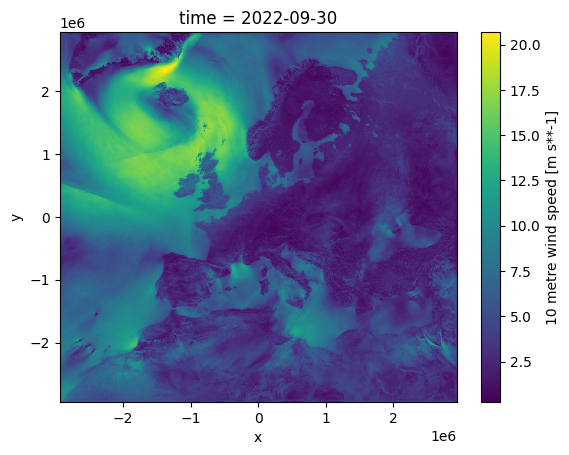

In [15]:
ds['ws'].isel(time=-1).plot()

In [16]:
Min x:  -1617000.0450800695
Max x:  -247500.04508006945
Min y:  -1727000.0094558797
Max y:  -357500.0094558797

SyntaxError: invalid syntax (3807958051.py, line 1)

### Select only the Iberian peninsula

The borders are selected from AEMET data borders. 

In [17]:
ds = ds.sel(y=slice(-1727000.0094558797-5500, -357500.0094558797), x=slice(-1617000.0450800695, -247500.04508006945+5500))

In [18]:
print(ds)

<xarray.Dataset> Size: 8GB
Dimensions:    (time: 4656, y: 250, x: 250)
Coordinates:
    latitude   (y, x) float64 500kB 33.06 33.07 33.08 ... 46.73 46.74 46.74
    longitude  (y, x) float64 500kB 351.2 351.2 351.3 ... 4.612 4.684 4.756
  * time       (time) datetime64[ns] 37kB 2010-01-01 2010-01-02 ... 2022-09-30
  * x          (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
  * y          (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
Data variables:
    ws         (time, y, x) float32 1GB ...
    r2         (time, y, x) float32 1GB ...
    t2m        (time, y, x) float32 1GB ...
    msl        (time, y, x) float32 1GB ...
    orog       (time, y, x) float32 1GB ...
    sp         (time, y, x) float32 1GB ...
    sr         (time, y, x) float32 1GB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    histor

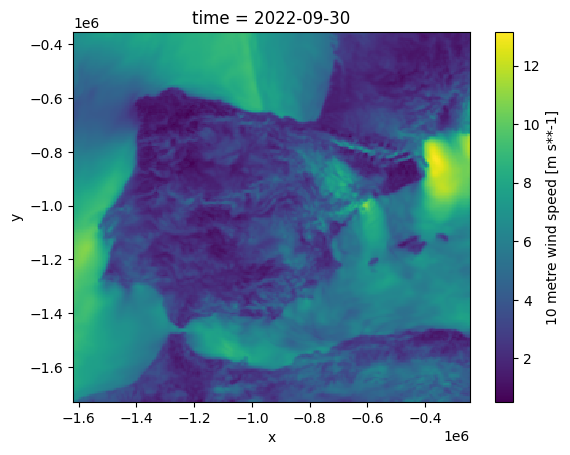

In [19]:
ds['ws'].isel(time=-1).plot()

In [20]:
print('Max ws value: ', ds["ws"].max())
print('Min ws value: ', ds["ws"].min())

Max ws value:  <xarray.DataArray 'ws' ()> Size: 8B
array(25.5357666)
Min ws value:  <xarray.DataArray 'ws' ()> Size: 8B
array(0.20898399)


#### Check for Nan values

In [21]:
ws_data = ds['ws']
#print("ws_data: ", ws_data.count()) -> Count non-null values
print("ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]))
print("NULL ws_data: ", ws_data.isnull().sum().item())
print("Non-null ws_data: ", ws_data.count().item())
print("Non-null ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]) - ws_data.isnull().sum().item())
print()
print("Rate: ")
print("Null ws_data", (ws_data.isnull().sum() * 100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())
print("Non-null ws_data: ", (ws_data.count() *  100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())

#ws_data_cleaned = ws_data.where(ws_data.isnull()==False, 0)

ws_data:  291000000
NULL ws_data:  0
Non-null ws_data:  291000000
Non-null ws_data:  291000000

Rate: 
Null ws_data 0.0
Non-null ws_data:  100.0


ws_data:  90885888
NULL ws_data:  0
Non-null ws_data:  90885888
Non-null ws_data:  90885888

Rate: 
Null ws_data 0.0
Non-null ws_data:  100.0

#### Save the data

In [22]:
print(ds)

<xarray.Dataset> Size: 8GB
Dimensions:    (time: 4656, y: 250, x: 250)
Coordinates:
    latitude   (y, x) float64 500kB 33.06 33.07 33.08 ... 46.73 46.74 46.74
    longitude  (y, x) float64 500kB 351.2 351.2 351.3 ... 4.612 4.684 4.756
  * time       (time) datetime64[ns] 37kB 2010-01-01 2010-01-02 ... 2022-09-30
  * x          (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
  * y          (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
Data variables:
    ws         (time, y, x) float32 1GB 3.6 3.41 2.965 ... 1.815 1.824 1.943
    r2         (time, y, x) float32 1GB ...
    t2m        (time, y, x) float32 1GB ...
    msl        (time, y, x) float32 1GB ...
    orog       (time, y, x) float32 1GB ...
    sp         (time, y, x) float32 1GB ...
    sr         (time, y, x) float32 1GB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution: 

In [23]:
ds.to_netcdf(path_out + name_outfile)